<a href="https://colab.research.google.com/github/anoopjakob/AI_Lab_9_SVM/blob/main/AI_Lab_9_SVM_Qn_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Question 2**

Handwritten Digit Recognition
In this part, you will apply your SVM classifier to recognize handwritten digits. Data sets for training and testing have been given in train 01 image and
test 01 images. To simplify things, we will only be distinguishing between 0’s and
1’s. The training data set includes 12665 images(28x28) while the testing data set
contains 2115 images. Each row represents an image, where the first term is the
label, and the rest are indices of the pixels and the corresponding gray values. Note
that only the pixels with non–zero gray values are given. Train your SVM model
by the training data and apply it to recognize the handwritten digits given in the
test data set. Answer the following questions

*  Train a linear SVM (i.e, no regularization with ξ i = 0, ∀i) on train 01 images.
What is the training error, i.e., the fraction of examples in the training data
that are misclassified? From the set of misclassified images, pick one. Why do
you think the SVM fails to classify it correctly during training? Now apply the
SVM to the test set test 01 image; what is the test error, i.e., the fraction of
test data that is misclassified?

*  Experiment with different values of the regularization term c. Start by guess-
ing/estimating a range in which you think c should lie. Then choose the values
of c (within that range) at which you will evaluate the performance of the SVM.You need not pick more than 10 such values, though you should feel free to pick
as many as you want. For these values of c, plot the corresponding error.

  *   A. What value of c gives you the best training error on the dataset?
  *   B. How does the test error for this choice of c compare with the test error you
computed in part (A)?

  *   C. Could you optimize c so that it leads to the best test error, rather than the
training error?

In [91]:
import numpy as np
import pandas as pd

# Standard scientific Python imports
import matplotlib.pyplot as plt



In [92]:
# data preprocessing
# since in the file we have a pixe index : pixel value pair 
# we have to do a lot of processing to make it to the correct format.

# this functios splits each rows
def split_list(train_list):
  train_list_final=[]
  for i in range(len(train_list)):
    temp = train_list[i][0].split()
    train_list_final.append(temp)

  return train_list_final


# this function splits each value in a row
def build_list(test_list):
  final_array  = np.zeros(785)
  final_list = final_array.tolist()
  for i in range(len(test_list)):
    if (i==0):
      if int(test_list[0]) == -1:
        final_list[0] == 0
      if int(test_list[0]) == 1:
        final_list[0] = 1
    else:
      two_list = test_list[i].split(':')
      index = int(two_list[0])
      value_inside = np.float(two_list[1])


      final_list[index] = value_inside
  return final_list

# this creates the final lists of lists for our dataframe
def create_final_df_list(list1):
  final_list = []
  
  train_list_stage_1 = split_list(list1)
  for i in range(len(train_list_stage_1)):
    temp_list = build_list(train_list_stage_1[i])
    
    final_list.append(temp_list)

  return final_list




In [93]:
from csv import reader

# Here we obtain the list of rows(each row is a single string) from file

train_list =[]
# open file in read mode
with open('/content/drive/MyDrive/AI-ML/AI_Lab_9/images/train_01_images',
          'r') as read_obj:
    # pass the file object to reader() to get the reader object
    csv_reader = reader(read_obj)
    # Iterate over each row in the csv using reader object
    for row in csv_reader:
        # row variable is a list that represents a row in csv
        train_list.append(row)

# this invokes all the functions above to get us final train list
train_list = create_final_df_list(train_list)


# created dataframe using above list
train_df = pd.DataFrame(train_list, dtype=float)

# to show the first five rows
train_df.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:
test_list =[]
# open file in read mode
with open('/content/drive/MyDrive/AI-ML/AI_Lab_9/images/test_01_images',
          'r') as read_obj:
    # pass the file object to reader() to get the reader object
    csv_reader = reader(read_obj)
    # Iterate over each row in the csv using reader object
    for row in csv_reader:
        # row variable is a list that represents a row in csv
        test_list.append(row)

# this invokes all the functions above to get us final train list
test_list = create_final_df_list(test_list)


# created dataframe using above list
test_df = pd.DataFrame(test_list, dtype=float)

# to show the first five rows
test_df.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


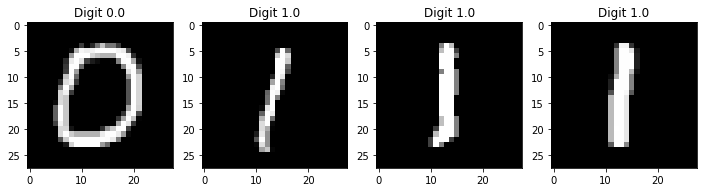

In [95]:

# plotting some images from train set

def plot_image(df, index):

  image_X = test_df.iloc[index, 1:]
  image_y = test_df.iloc[index,0]

  img = image_X
  img = img.values.reshape(28,28)
  plt.imshow(img, cmap='gray')
  # plt.title(f'{image_y} is predicted as: {clf.predict([image_X])}')

  plt.title(f'Digit {image_y}')

plt.figure(figsize=(12,10))

plt.subplot(1, 4, 1)
plot_image(train_df, 3 )

plt.subplot(1, 4, 2)
plot_image(train_df, 15)

plt.subplot(1, 4, 3)
plot_image(train_df, 5)

plt.subplot(1, 4, 4)
plot_image(train_df, 25)


plt.show()

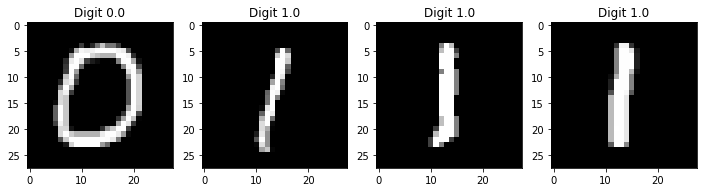

In [96]:
# plotting some images from test set


plt.figure(figsize=(12,10))

plt.subplot(1, 4, 1)
plot_image(test_df, 3 )

plt.subplot(1, 4, 2)
plot_image(test_df, 15)

plt.subplot(1, 4, 3)
plot_image(test_df, 5)

plt.subplot(1, 4, 4)
plot_image(test_df, 25)


In [97]:
# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

In [98]:
def plot_image_from_df(df, index, clf):

  image_X = test_df.iloc[index, 1:]
  image_y = test_df.iloc[index,0]

  plt.figure(figsize=(3,3))
  img = image_X
  img = img.values.reshape(28,28)
  # plt.subplot(1, 4, 1)
  plt.imshow(img, cmap='gray')
  plt.title(f'{image_y} is predicted as: {clf.predict([image_X])}')

def plot_image_from_array(xarray, yarray, index, clf):
  image_X = xarray[index]
  image_y = yarray[index]

  plt.figure(figsize=(3,3))
  img = image_X
  img = img.reshape(28,28)
  # plt.subplot(1, 4, 1)
  plt.imshow(img, cmap='gray')
  plt.title(f'{image_y} is predicted as: {clf.predict([image_X])}')
  


for C : 1
model score : 0.9981578947368421
Accuracy of SVM classifier is 99.81578947368422
Error of the classifier is : 0.1842105263157805 

Total misclassification from the splitted test data:7 

 They are : 

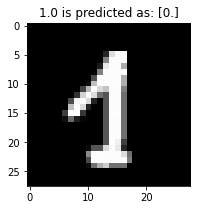

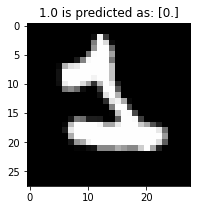

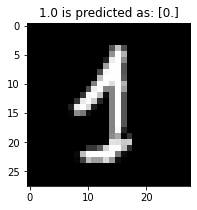

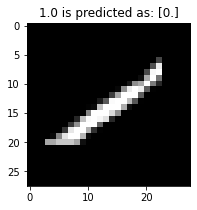

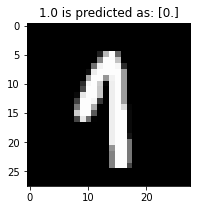

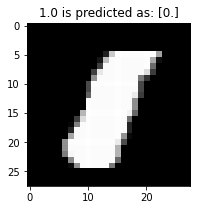

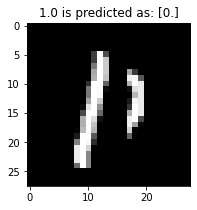

In [99]:
def classifier(C):
  clf = svm.LinearSVC(C = C)
  print('for C :',C)

  # clf = svm.SVC(verbose = True)
  features = train_df.drop(0, axis =1)
  target = yy = train_df[0]

  X_train, X_test, y_train, y_test = train_test_split(
    features , target, test_size=0.3)

  clf.fit(X_train, y_train)

  print('model score :', clf.score(X_test, y_test))

  y_predict = clf.predict(X_test)

  correct_classfication = np.sum(y_predict == y_test)

  percentage_correct = (correct_classfication/len(y_predict))*100

  print(f'Accuracy of SVM classifier is {percentage_correct}')
  print(f'Error of the classifier is : {100-percentage_correct} \n')

  print(f'Total misclassification from the splitted test data:{len(y_predict) - np.sum(y_predict == y_test)} ')

  print(f'\n They are : ', end='')

  y_test_array = np.array(y_test)
  X_test_array = np.array(X_test)

  for i in range(len(y_predict)):
    if (y_predict[i] != y_test_array[i]):
      plot_image_from_array(X_test_array, y_test_array, i, clf)
    # print(X_test[1].shape)

  return clf

# function call
clf1 = classifier(1)

Acuuracy is: 99.90543735224587

 Error of the classifier is:  0.09456264775413104

 Total misclassifications are : 2
  They are


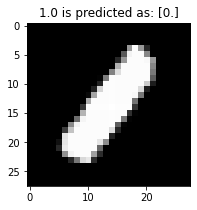

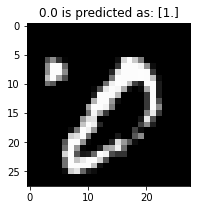

In [100]:
# model score on avilabe test image dataset

# this is from the test image dataset given

def predict_for_test_df(clf):
  X_test_1 = test_df.drop(0, axis =1)
  y_test_1 = test_df[0]

  print(f'Acuuracy is: {clf.score(X_test_1, y_test_1)*100}')
  print('\n Error of the classifier is: ',100 -clf.score(X_test_1, y_test_1)*100 )

  y_predict = clf.predict(X_test_1)

  print(f'\n Total misclassifications are : {len(y_predict) - np.sum(y_predict == y_test_1)}')
  print('  They are')

  for i in range(len(y_predict)):
    if y_predict[i] != y_test_1[i]:
      plot_image_from_df(test_df, i, clf)


# function call

predict_for_test_df(clf1)

 calculating for 10000.0
 Lowest Error is at C : 526.3157989473684
Accuracy at C = 526.3157989473684 is 99.89473684210526 % 
 
 

 Lowest Error is at C : 6315.789477368421
Accuracy at C = 6315.789477368421 is 99.89473684210526 % 
 
 


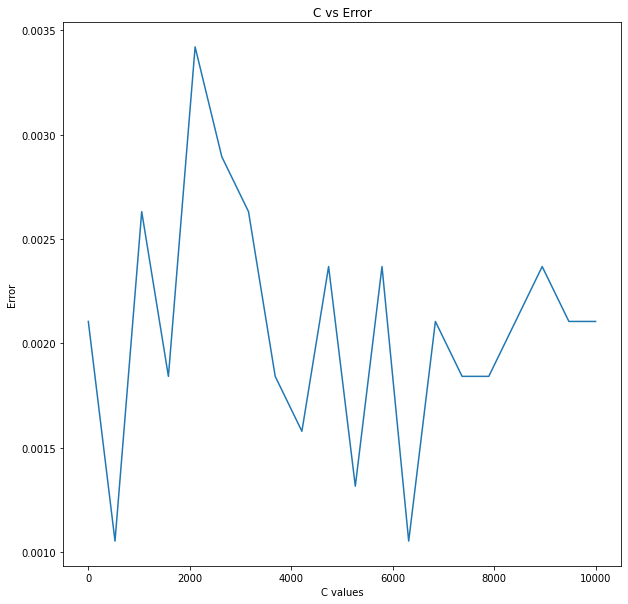

lowest errors is : 0.001052631578947416


In [103]:
# Classification error vs C


def classifier_return_error(C):
  clf = svm.LinearSVC(C = C)

  # clf = svm.SVC(verbose = True)
  features = train_df.drop(0, axis =1)
  target = yy = train_df[0]

  X_train, X_test, y_train, y_test = train_test_split(
    features , target, test_size=0.3)

  clf.fit(X_train, y_train)


  y_predict = clf.predict(X_test)


  return 1- clf.score(X_test,y_test)


error_list = []
C_list = np.linspace(0.00001, 10000, 20)

C_temp = 0

for value in C_list:
  error_list.append(classifier_return_error(value))
  print(f'\r calculating for {value}', end='', flush=True)

for i in range(len(error_list)):
  if error_list[i] == np.min(error_list):
    print('\n Lowest Error is at C :', C_list[i])
    print(f'Accuracy at C = {C_list[i]} is {(1-np.min(error_list))*100} % \n \n ')


plt.figure(figsize=(10,10))
plt.plot(C_list, error_list)
plt.xlabel('C values')
plt.ylabel('Error')
plt.title("C vs Error")

plt.show()



print(f'lowest errors is : {np.min(error_list)}')